In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 
import sklearn
import statsmodels.api as sm

%matplotlib inline

In [2]:
data = pd.read_csv('C:/python/new syllabus/Linear regression/faithful.csv')

data.head()


,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [3]:

# What type of values are stored in the columns?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 2 columns):
eruptions    272 non-null float64
waiting      272 non-null int64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


In [4]:
# Let's look at some statistical information about our dataframe
data.describe()

,eruptions,waiting
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


C:\Users\ABC\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\ABC\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


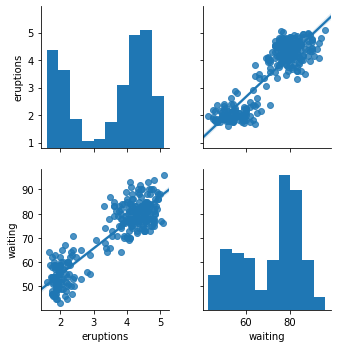

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Let's plot a pair plot of all numerical variables in our dataframe
#sns.pairplot(data)

sns.pairplot(data, kind='reg')


(40.0, 100.0)

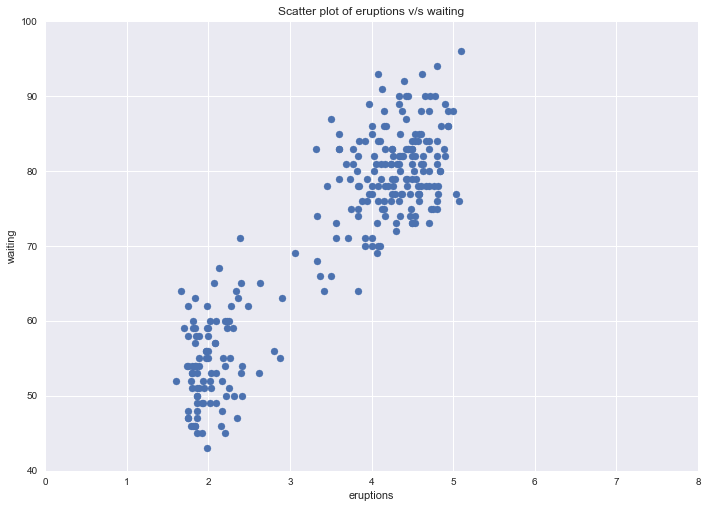

In [10]:
x = data['eruptions']

y = data['waiting']



plt.scatter(x, y)
plt.title('Scatter plot of eruptions v/s waiting')
plt.xlabel('eruptions')
plt.ylabel('waiting')

plt.xlim([0,8.0])
plt.ylim([40,100])

In [11]:
data.isnull().sum()


eruptions    0
waiting      0
dtype: int64

In [12]:
duration_mean = np.mean(data.eruptions)
print(duration_mean)

3.4877830882352936


In [13]:
waiting_mean = np.mean(data.waiting)
print(waiting_mean)

70.8970588235294


# Exploratory Data Analysis

Exploratory Data Analysis is a very important step before training the model. 
In this section, we will use some 
visualizations to understand the relationship 
of the target variable with other features.

AttributeError: 'Rectangle' object has no property 'normed'

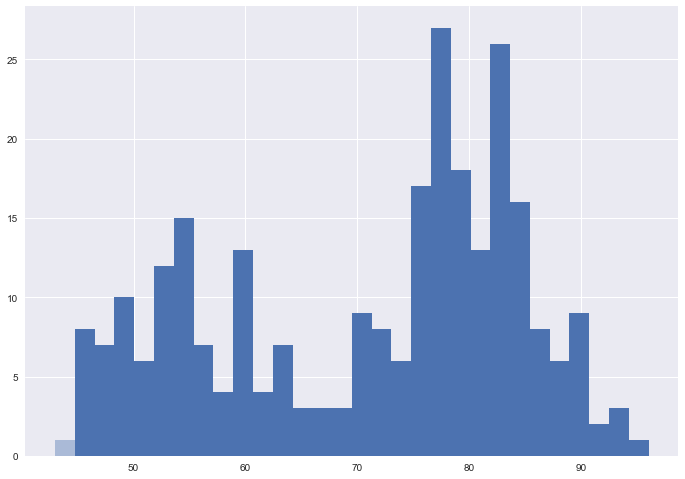

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data['waiting'], bins=30)
plt.show()


#add a line of code to get the skewness co-efficient

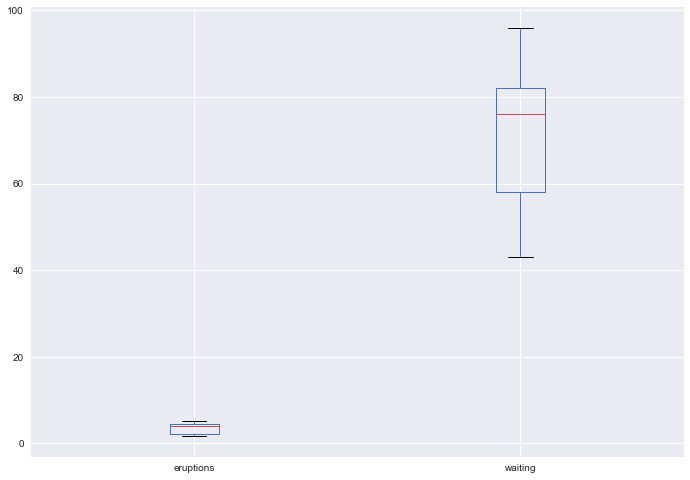

In [27]:
data.boxplot() #for plotting boxplots for all the numerical columns in the df
plt.show()

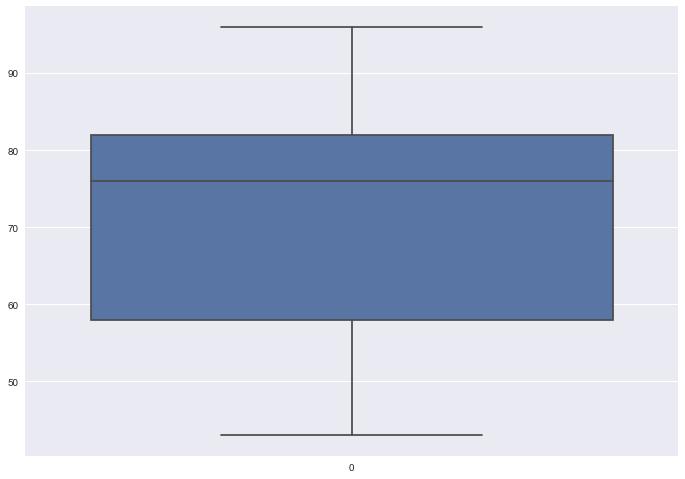

In [28]:
sns.boxplot(data=data["waiting"])

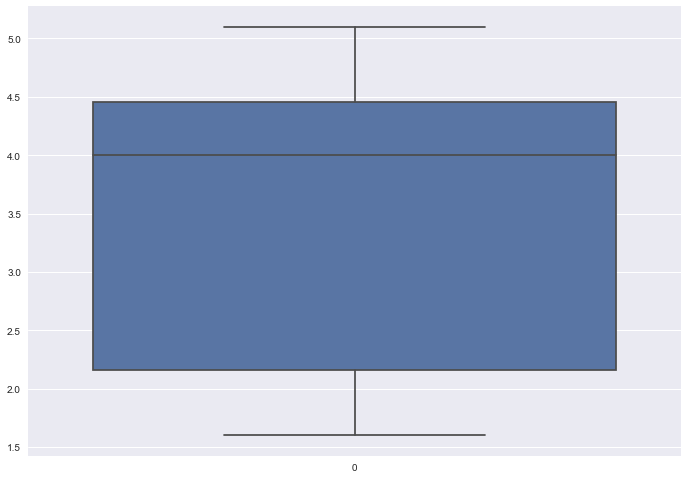

In [29]:
sns.boxplot(data=data["eruptions"])

We create a correlation matrix that measures the linear relationships between the variables. The correlation matrix can be formed by using the corr function from the pandas dataframe library. 
We will use the heatmap function from the seaborn library to plot the correlation matrix.

The correlation coefficient ranges from -1 to 1. If the value is close to 1, 
it means that there is a strong positive correlation between the two variables. 
When it is close to -1, the variables have a strong negative correlation.

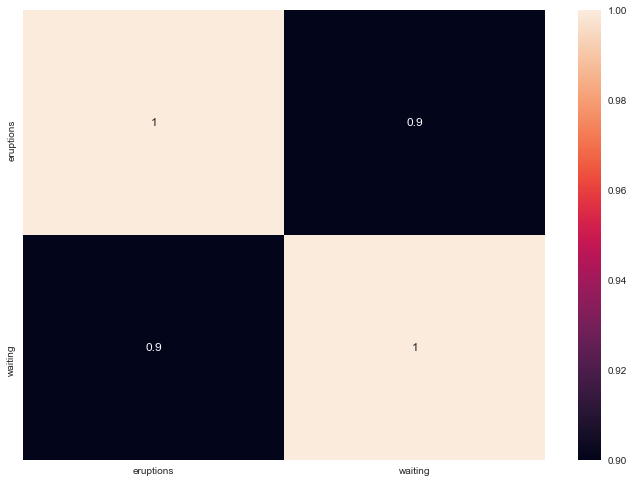

In [30]:
correlation_matrix = data.corr().round(2) #.corr()= pearson function of finding the correlation
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [15]:
#random_state is the seed used by the random number generator. It can be any integer.
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7 , random_state=100)

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state= 100)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(190,)
(82,)
(190,)
(82,)


In [32]:
lm = sm.OLS( Y_train, X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                waiting   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     6655.
Date:                Sat, 02 Nov 2019   Prob (F-statistic):          2.86e-149
Time:                        15:48:32   Log-Likelihood:                -742.39
No. Observations:                 190   AIC:                             1487.
Df Residuals:                     189   BIC:                             1490.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
eruptions     19.3123      0.237     81.580      0.000      18.845      19.779
==============================================================================
Omnibus:                       19.592   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.586
Skew:                           0.222   Prob(JB):                       0.0225
Kurtosis:                       2.128   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""